link on author`s git: https://github.com/fchollet/deep-learning-with-pythoan-notebooks/blob/master/3.5-classifying-movie-reviews.ipynb

In [22]:
import numpy as np
from scipy.sparse import csr_matrix

import matplotlib.pyplot as plt

import keras
from tensorflow.keras.datasets import imdb
from keras import models
from keras import layers

In [2]:
print(np.__version__)

1.17.0


**Data downloading**

In [3]:
#dataset with top 10000 words in users film reviews
# train_data - only labels, not words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

Let`s print an example of review

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict((value, key) for (key, value) in word_index.items())
# we use get because of exception - words that not in top 10000
# https://pythonworld.ru/tipy-dannyx-v-python/slovari-dict-funkcii-i-metody-slovarej.html
decoded_review_example = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) 
decoded_review_example

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

**Data preparations**

In [5]:
def vectorize_sequence(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [16]:
x_train = csr_matrix(vectorize_sequence(train_data))
print(x_train.shape)

(25000, 10000)


In [17]:
x_test = csr_matrix(vectorize_sequence(test_data))
print(x_test.shape)

(25000, 10000)


In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Set model**

In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

W0821 17:14:53.112281 139910887257920 deprecation_wrapper.py:119] From /home/grigoriy/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0821 17:14:53.366531 139910887257920 deprecation_wrapper.py:119] From /home/grigoriy/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 17:14:53.405589 139910887257920 deprecation_wrapper.py:119] From /home/grigoriy/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [14]:
model.compile(optimizer = 'Adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

W0821 17:17:34.844676 139910887257920 deprecation_wrapper.py:119] From /home/grigoriy/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0821 17:17:34.884392 139910887257920 deprecation_wrapper.py:119] From /home/grigoriy/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0821 17:17:34.895560 139910887257920 deprecation.py:323] From /home/grigoriy/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


**Learning**

In [19]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs = 20, batch_size = 512, 
                   validation_data = (x_val, y_val))

W0821 17:23:43.085702 139910887257920 deprecation_wrapper.py:119] From /home/grigoriy/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 380us/step - loss: 0.5583 - acc: 0.7606 - val_loss: 0.4035 - val_acc: 0.8563
Epoch 2/20
15000/15000 [==============================] - 3s 171us/step - loss: 0.2979 - acc: 0.9003 - val_loss: 0.2922 - val_acc: 0.8885
Epoch 3/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.1949 - acc: 0.9340 - val_loss: 0.2772 - val_acc: 0.8891
Epoch 4/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.1418 - acc: 0.9531 - val_loss: 0.2893 - val_acc: 0.8863
Epoch 5/20
15000/15000 [==============================] - 3s 190us/step - loss: 0.1063 - acc: 0.9695 - val_loss: 0.3075 - val_acc: 0.8840
Epoch 6/20
15000/15000 [==============================] - 3s 184us/step - loss: 0.0798 - acc: 0.9797 - val_loss: 0.3339 - val_acc: 0.8816
Epoch 7/20
15000/15000 [==============================] - 3s 193us/step - loss: 0.0596 - acc: 0.9885 - val_loss: 0.3631 - 

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

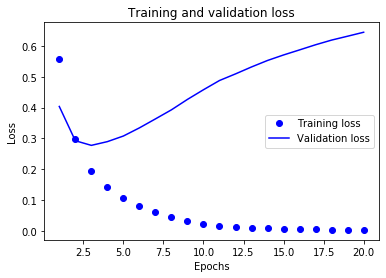

In [28]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history.history['acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

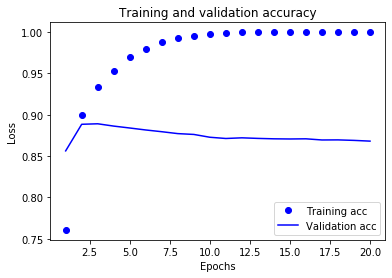

In [30]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

We can see overfit problem after 4-th epoch

Let's train a new network from scratch for four epochs, then evaluate it on our test data:

In [32]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'Adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 4, batch_size = 512)
result = model.evaluate(x_test, y_test)
print(result)

Epoch 1/4
25000/25000 [==============================] - 4s 164us/step - loss: 0.4963 - acc: 0.7951
Epoch 2/4
25000/25000 [==============================] - 3s 112us/step - loss: 0.2570 - acc: 0.9073
Epoch 3/4
25000/25000 [==============================] - 3s 113us/step - loss: 0.1857 - acc: 0.9344
Epoch 4/4
25000/25000 [==============================] - 4s 148us/step
[0.30800292499542237, 0.88068]


In [33]:
model.predict(x_test)

array([[0.15033266],
       [0.9997546 ],
       [0.6415544 ],
       ...,
       [0.09644148],
       [0.05572784],
       [0.66069525]], dtype=float32)